### Project Description:
This project tries to enhanch revenue for an online sports clothing company. Our focus revolves around exploring various aspects of product data, including pricing, reviews, descriptions, and ratings. Additionally, we will analyze metrics such as revenue and website traffic to generate actionable recommendations for the company's marketing and sales teams.

The database provided to us, sports, contains five tables, with product_id being the primary key for all of them.
</p>
<h3 id="info"><code>info</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_name</code></td>
<td><code>varchar</code></td>
<td>Name of the product</td>
</tr>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>description</code></td>
<td><code>varchar</code></td>
<td>Description of the product</td>
</tr>
</tbody>
</table>
<h3 id="finance"><code>finance</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>listing_price</code></td>
<td><code>float</code></td>
<td>Listing price for product</td>
</tr>
<tr>
<td><code>sale_price</code></td>
<td><code>float</code></td>
<td>Price of the product when on sale</td>
</tr>
<tr>
<td><code>discount</code></td>
<td><code>float</code></td>
<td>Discount, as a decimal, applied to the sale price</td>
</tr>
<tr>
<td><code>revenue</code></td>
<td><code>float</code></td>
<td>Amount of revenue generated by each product, in US dollars</td>
</tr>
</tbody>
</table>
<h3 id="reviews"><code>reviews</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_name</code></td>
<td><code>varchar</code></td>
<td>Name of the product</td>
</tr>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>rating</code></td>
<td><code>float</code></td>
<td>Product rating, scored from <code>1.0</code> to <code>5.0</code></td>
</tr>
<tr>
<td><code>reviews</code></td>
<td><code>float</code></td>
<td>Number of reviews for the product</td>
</tr>
</tbody>
</table>
<h3 id="traffic"><code>traffic</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>last_visited</code></td>
<td><code>timestamp</code></td>
<td>Date and time the product was last viewed on the website</td>
</tr>
</tbody>
</table>
<h3 id="brands"><code>brands</code></h3>
<table>
<thead>
<tr>
<th>column</th>
<th>data type</th>
<th>description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>product_id</code></td>
<td><code>varchar</code></td>
<td>Unique ID for product</td>
</tr>
<tr>
<td><code>brand</code></td>
<td><code>varchar</code></td>
<td>Brand of the product</td>
</tr>
</tbody>
</table>
<p>We will be dealing with missing data as well as numeric, string, and timestamp data types to draw insights about the products in the online store. Let's start by finding out how complete the data is.</p>



### Loading Necessary Librarries

In [178]:
%load_ext sql
import matplotlib.pyplot as plt
%sql sqlite:///sports.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Lets take a look about 5 tables

In [182]:
%%sql 
SELECT * FROM info LIMIT 5;

   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


product_name,product_id,description
product_name,product_id,description
None,AH2430,None
Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailored just for women. Perforated 3-Stripes on the leather upper of these shoes offer a sleek look that mirrors iconic tennis styles."
Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come with slim straps for a great fit. Feature performance logo on the footbed and textured Rubber outsole that gives unique comfort.
Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's shoes step out with unexpected style. They're built with a breathable knit upper, while the heel offers the extra support of an Achilles-hugging design. The cushioned midsole provides a soft landing with every stride."


In [184]:
%%sql 
SELECT * FROM finance LIMIT 5;

   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


product_id,listing_price,sale_price,discount,revenue
product_id,listing_price,sale_price,discount,revenue
AH2430,None,None,None,None
G27341,75.99,37.99,0.5,1641.17
CM0081,9.99,5.99,0.4,398.93
B44832,69.99,34.99,0.5,2204.37


In [185]:
%%sql 
SELECT * FROM reviews LIMIT 5;

   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


product_id,rating,reviews
product_id,rating,reviews
AH2430,None,None
G27341,3.3,24.0
CM0081,2.6,37.0
B44832,4.1,35.0


In [186]:
%%sql 
SELECT * FROM traffic LIMIT 5;

   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


product_id,last_visited
product_id,last_visited
AH2430,2018-05-19 15:13:00
G27341,2018-11-29 16:16:00
CM0081,2018-02-01 10:27:00
B44832,2018-09-07 20:06:00


In [187]:
%%sql 
SELECT * FROM brands LIMIT 5;

   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


product_id,brand
G27341,Adidas
CM0081,Adidas
B44832,Adidas
D98205,Adidas
B75586,Adidas


Let's begin by counting the total number of rows and then proceed to calculate the number of non-missing entries for description, listing_price, and last_visited. Additionally, the script involves joining the info, finance, and traffic datasets.

In [188]:
%%sql
    
-- Count all columns as total_rows
-- Count the number of non-missing entries for description, listing_price, and last_visited
-- Join info, finance, and traffic
SELECT COUNT(*) AS total_rows, 
    COUNT(i.description) AS count_description, 
    COUNT(f.listing_price) AS count_listing_price, 
    COUNT(t.last_visited) AS count_last_visited 
FROM info AS i
INNER JOIN finance AS f
    ON i.product_id = f.product_id
INNER JOIN traffic AS t
    ON t.product_id = f.product_id;

   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


total_rows,count_description,count_listing_price,count_last_visited
3180,3118,3121,2929


The database comprises a total of 3,179 products. Among the columns examined, only one—last_visited—has more than five percent of missing values. Now, our focus shifts to pricing.

### Nike vs Adidas Price Point Comparison
To understand the differences in price points between Nike and Adidas products, we aim to build insights into the company's stock range and customer market. Our analysis involves running a query to generate a distribution of the listing_price along with the count for each price, grouped by brand.


In [191]:
%%sql
    
-- Select the brand, listing_price as an integer, and a count of all products in finance 
-- Join brands to finance on product_id
-- Filter for products with a listing_price more than zero
-- Aggregate results by brand and listing_price, and sort the results by listing_price in descending order
SELECT b.brand, 
       CAST(f.listing_price AS INTEGER) AS listing_price, 
       COUNT(*) AS count_of_products,
       COUNT(*) OVER () AS total_unique_price_products
FROM finance AS f
INNER JOIN brands AS b 
    ON f.product_id = b.product_id
WHERE listing_price > 0
GROUP BY b.brand, f.listing_price
ORDER BY listing_price DESC;


   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


brand,listing_price,count_of_products,total_unique_price_products
Adidas,299,2,77
Adidas,279,4,77
Adidas,239,5,77
Adidas,229,8,77
Adidas,219,11,77
Adidas,199,8,77
Nike,199,1,77
Adidas,189,7,77
Nike,189,2,77
Adidas,179,34,77


In our database, we've identified a total of 77 unique prices for the products, complicating the analysis of our last query.
### Labeling Price Ranges
To enhance clarity, we will extend our previous query by categorizing prices into distinct ranges. This involves grouping the data by brand and label, and additionally, we will include the total revenue for each identified price range and brand.


In [145]:
%%sql

-- Select the brand, a count of all products in the finance table, and total revenue
-- Create four labels for products based on their price range, aliasing as price_category
-- Join brands to finance on product_id and filter out products missing a value for brand
-- Group results by brand and price_category, sort by total_revenue
SELECT b.brand, COUNT(*), SUM(f.revenue) as total_revenue,
    CASE WHEN f.listing_price < 42 THEN 'Budget'
         WHEN f.listing_price >= 42 AND f.listing_price < 74 THEN 'Average'
         WHEN f.listing_price >= 74 AND f.listing_price < 129 THEN 'Expensive'
         ELSE 'Elite' END AS price_category
FROM finance AS f
INNER JOIN brands AS b 
    ON f.product_id = b.product_id
WHERE b.brand IS NOT NULL
GROUP BY b.brand, price_category
ORDER BY total_revenue DESC;


   sqlite://
 * sqlite:///sports.db
Done.


brand,COUNT(*),total_revenue,price_category
Adidas,849,4626980.069999999,Expensive
Adidas,1060,3233661.060000001,Average
Adidas,307,3014316.8299999987,Elite
Adidas,359,651661.1200000002,Budget
Nike,357,595341.0199999992,Budget
Nike,82,128475.59000000003,Elite
Nike,90,71843.15000000004,Expensive
Nike,16,6623.5,Average


Upon grouping products by brand and price range, an interesting insight emerges: Adidas items consistently generate higher total revenue across all price categories.
### Average Discount by Brand
It's important to note that our analysis has focused on the listing_price, which might not reflect the actual selling price. To gain a better understanding of revenue, we will now shift our attention to examining discounts. Discounts represent the percentage reduction in the listing_price when the product is sold, and we aim to explore whether variations in discount amounts between brands are influencing overall revenue.


In [192]:
%%sql
    
-- Select brand and average_discount as a percentage
-- Join brands to finance on product_id
-- Aggregate by brand
-- Filter for products without missing values for brand
SELECT b.brand, AVG(f.discount) * 100 AS average_discount
FROM brands AS b
INNER JOIN finance AS f 
    ON b.product_id = f.product_id
GROUP BY b.brand
HAVING b.brand IS NOT NULL
ORDER BY average_discount;

   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


brand,average_discount
Nike,0.0
Adidas,33.452427184465606


An intriguing discovery surfaces: Nike products surprisingly do not offer any discounts, while Adidas products, despite being the top revenue generators, come with substantial discounts!
To optimize revenue, the company might consider adjusting the discount strategy for Adidas products, monitoring sales volume for stability. Alternatively, a slight discount on Nike products could be experimented with, potentially increasing overall revenue through higher sales volume despite a lower average revenue per Nike product.
### Correlation Between Revenue and Reviews
With these considerations in mind, we will now delve into exploring relationships between various columns in our database. Specifically, we aim to assess the strength and direction of the correlation between revenue and product reviews.


In [147]:
%%sql

-- Calculate the R-squared between reviews and revenue as review_revenue_corr
-- Join the reviews and finance tables on product_id
WITH joined_data AS (
    SELECT r.reviews AS x, f.revenue AS y
    FROM reviews AS r
    INNER JOIN finance AS f ON r.product_id = f.product_id
)

SELECT
    (SUM((x - avg_x) * (y - avg_y)) * SUM((x - avg_x) * (y - avg_y))) /
    NULLIF(SUM((x - avg_x) * (x - avg_x)) * SUM((y - avg_y) * (y - avg_y)), 0) AS review_revenue_corr
FROM (
    SELECT
        jd.*,
        (SELECT AVG(x) FROM joined_data) AS avg_x,
        (SELECT AVG(y) FROM joined_data) AS avg_y
    FROM joined_data AS jd
) jd;



   sqlite://
 * sqlite:///sports.db
Done.


review_revenue_corr
0.42505574365155013


### Ratings and Reviews by Product Description Length

An intriguing observation unfolds: a robust positive correlation exists between revenue and reviews. This suggests that increasing the number of reviews on the company's website could potentially boost sales, particularly for items garnering a larger number of reviews.

To explore further, we contemplate whether the length of a product's description might impact its rating and reviews. If such a correlation exists, the company could develop content guidelines for product listings, conducting tests to assess the influence on revenue. Let's delve into this aspect to gain more insights!


In [199]:
#Calculate description_length
#Convert rating to a numeric data type and calculate average_rating
#Join info to reviews on product_id and group the results by description_length
#Filter for products without missing values for description, and sort results by description_length

result = %sql SELECT CAST(LENGTH(i.description) AS INTEGER) / 100 * 100 AS description_length, \
                      ROUND(AVG(CAST(r.rating AS NUMERIC)), 2) AS average_rating \
               FROM info AS i \
               INNER JOIN reviews AS r ON i.product_id = r.product_id \
               WHERE i.description IS NOT NULL \
               GROUP BY description_length \
               ORDER BY description_length;

#Store the result as a Pandas DataFrame
df = result.DataFrame()


#Display the DataFrame
df



   sqlite://
 * sqlite:///sports.db
   sqlite:///your_database_name.db
Done.


,description_length,average_rating
0,0,1.60
1,100,3.21
2,200,3.27
3,300,3.29
4,400,3.32
5,500,3.12
6,600,3.65


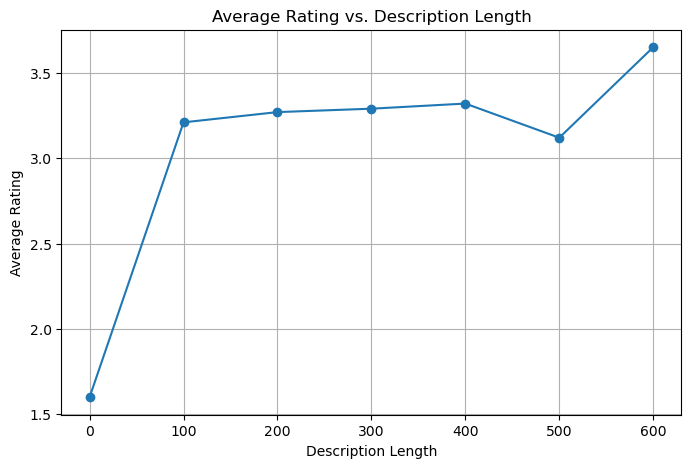

In [201]:
# Convert the SQL result to a Pandas DataFrame
df = result.DataFrame()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df['description_length'], df['average_rating'], marker='o')
plt.title('Average Rating vs. Description Length')
plt.xlabel('Description Length')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

A notable finding suggests a positive correlation between the length of a product's description and its rating.
Given the established correlation between reviews and revenue, a strategic approach for the company could involve experimenting with various sales processes to encourage more customer reviews. For instance, offering a small discount on future purchases could be explored.
### Reviews by Month and Brand
To gain deeper insights, we will now examine the volume of reviews by month, aiming to identify trends or gaps that could be leveraged for further strategic considerations.


In [149]:
%%sql


-- Select brand, month from last_visited, and a count of all products in reviews aliased as num_reviews
-- Join traffic with reviews and brands on product_id
-- Group by brand and month, filtering out missing values for brand and month
-- Order the results by brand and month
SELECT b.brand, strftime('%m', t.last_visited) AS month, COUNT(r.product_id) AS num_reviews
FROM brands AS b
INNER JOIN traffic AS t 
    ON b.product_id = t.product_id
INNER JOIN reviews AS r 
    ON t.product_id = r.product_id
GROUP BY b.brand, month
HAVING b.brand IS NOT NULL
    AND strftime('%m', t.last_visited) IS NOT NULL
ORDER BY b.brand, month;



   sqlite://
 * sqlite:///sports.db
Done.


brand,month,num_reviews
Adidas,01,253
Adidas,02,272
Adidas,03,269
Adidas,04,180
Adidas,05,172
Adidas,06,159
Adidas,07,170
Adidas,08,189
Adidas,09,181
Adidas,10,192


Observations reveal that product reviews peak in the first quarter of the calendar year, suggesting an opportunity to conduct experiments aimed at boosting review volumes during the remaining nine months.

### Footwear Product Performance
Shifting our focus from Adidas vs Nike products, we'll now explore the types of products being sold. Given the absence of explicit labels for product types, we plan to create a Common Table Expression (CTE) to filter descriptions for keywords. Subsequently, we will utilize the results to ascertain the proportion of the company's stock comprised of footwear products and assess the median revenue generated by these items.


In [150]:
%%sql
-- Create the footwear CTE, containing description and revenue
-- Filter footwear for products with a description containing %shoe%, %trainer, or %foot%
-- Also filter for products that are not missing values for description
-- Calculate the number of products and median revenue for footwear products
WITH footwear AS
(
    SELECT i.description, f.revenue
    FROM info AS i
    INNER JOIN finance AS f 
        ON i.product_id = f.product_id
    WHERE (i.description LIKE '%shoe%'
        OR i.description LIKE '%trainer%'
        OR i.description LIKE '%foot%')
        AND i.description IS NOT NULL
)

SELECT COUNT(*) AS num_footwear_products, 
    (SELECT AVG(revenue) FROM (SELECT revenue FROM footwear ORDER BY revenue LIMIT 2 - (SELECT COUNT(*) FROM footwear) % 2 OFFSET (SELECT (COUNT(*) - 1) / 2 FROM footwear)))
AS median_footwear_revenue FROM footwear ;


   sqlite://
 * sqlite:///sports.db
Done.


num_footwear_products,median_footwear_revenue
2700,3121.02


Recalling our initial findings that identified 3,117 products without missing values for description, we discovered that among them, 2,700 are footwear products, constituting approximately 85% of the company's inventory. Remarkably, these footwear products boast a median revenue exceeding $3000.
### Clothing Product Performance
While this insight is intriguing, we lack a benchmark for determining whether the median revenue for footwear products is favorable or not compared to other product categories. For our final task, we will revisit the footwear analysis, subsequently applying a filter to assess the count and median revenue of products that do not fall under the footwear category.


In [151]:
%%sql
-- Copy the footwear CTE from the previous task
-- Calculate the number of products in info and median revenue from finance
-- Inner join info with finance on product_id
-- Filter the selection for products with a description not in footwear
WITH footwear AS
(
    SELECT i.description, f.revenue
    FROM info AS i
    INNER JOIN finance AS f 
        ON i.product_id = f.product_id
    WHERE (i.description LIKE '%shoe%'
        OR i.description LIKE '%trainer%'
        OR i.description LIKE '%foot%')
        AND i.description IS NOT NULL
)

SELECT 
    (SELECT COUNT(*) FROM info AS i WHERE i.description NOT IN (SELECT description FROM footwear)) AS num_clothing_products, 
    AVG(revenue) AS median_clothing_revenue
FROM (
    SELECT f.revenue
    FROM info AS i
    INNER JOIN finance AS f ON i.product_id = f.product_id
    WHERE i.description NOT IN (SELECT description FROM footwear)
    ORDER BY f.revenue
    LIMIT 2 - (SELECT COUNT(*) FROM info WHERE description NOT IN (SELECT description FROM footwear)) % 2
    OFFSET (SELECT (COUNT(*) - 1) / 2 FROM info WHERE description NOT IN (SELECT description FROM footwear))
) AS subquery;


   sqlite://
 * sqlite:///sports.db
Done.


num_clothing_products,median_clothing_revenue
418,503.82


The company boasts a notably larger inventory of footwear products (2700) than clothing products (418).Footwear products exhibit a higher median revenue 3121.02 usd  compared to clothing products 503.82 usd, implying their greater financial impact.These findings suggest that prioritizing footwear in marketing and sales strategies could be beneficial due to their higher average revenue. 
